<a href="https://colab.research.google.com/github/guivieiratorres/portifolio/blob/master/Acidentes_de_tr%C3%A2nsito_V%C3%ADtimas_POA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objetivos para extração de dados:**

*Registro de vítimas de acidentes de trânsito no município de Porto Alegre, tipificados de acordo com existência de pessoas feridas e vítimas fatais.*

[Fonte dos dados](http://datapoa.com.br/dataset/acidentes-de-transito-vitimas)

1.   Fazer a limpeza e verificação dos dados
2.   Qual sexo teve mais ocorrência de acidentes?
  *    Masculino 18.099 ocorrências
  *    Feminino 7.831 ocorrências
  *    NAO INFORMADO 721


3.   Qual região de Porto Alegre teve mais ocorrências?
  *   NORTE: 8.104 ocorrências
  *   LESTE: 7.964 ocorrências
  *   SUL: 7.559 ocorrências
  *   CENTRO: 3.020 ocorrências
4.   Qual a média de idade global e por sexo?
  *   Média global: 36.2 anos
  *   Média masculino: 34.9 anos
  *   Média feminina: 39.0 anos
5.   Qual a faixa etária mais predominante e sua % em relação ao total?
  *   26 A 35 anos: 6.653 ocorrências
  *   24.9%

6.   Qual o dia da semana e o turno onde mais teve ocorrências?
  *   SEXTA-FEIRA: 4191
  *   TARDE: 9123

7.   Qual foi o mês mais  perigoso de 2017?
  *   SEXTA-FEIRA: 4191
  *   TARDE: 9123


8.   Gerar Gráficos pertinentes.





In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Python_estudos/planilhas/cat_vitimas.csv', delimiter= ';')

df.head(50)

#dados.describe()



In [ ]:
#1.Fazer a limpeza e verificação dos dados

#df.isnull().sum()

from geopy.geocoders import Nominatim

#Rua Souza lobo, 685 Porto Alegre RS

local = Nominatim(user_agent="MyGeocoder")

coord = local.geocode("Rua Souza lobo, 687 Porto Alegre RS")

coord.point

Point(-30.0359886, -51.1550924, 0.0)

In [ ]:

#2.Qual sexo teve mais ocorrência de acidentes?

df_m = df.set_index('sexo').loc['MASCULINO'] # retorna todas as linhas com valor Masculino (18.099 linhas )
df_f = df.set_index('sexo').loc['FEMININO'] # retorna todas as linhas com valor FEMININO (7.831 linhas )
pd.value_counts(df['sexo'])


,data_extracao,longitude,latitude,idacidente,data,hora,idade,sit_vitima,log1,log2,predial1,regiao,tipo_acid,auto,taxi,onibus_urb,onibus_met,onibus_int,caminhao,moto,carroca,bicicleta,outro,lotacao,dia_sem,periododia,fx_et,tipo_veic,consorcio
sexo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
MASCULINO,2022-01-01 01:39:47,-51.191463,-30.041775,630933,2017-01-05 00:00:00,17:00:00.0000000,2.0,OCUPANTE,AV PROTASIO ALVES,NaN,1700,LESTE,COLISÃO,3,0,0,0,0,0,0,0,0,0,0,QUINTA-FEIRA,TARDE,0 A 10,AUTOMÓVEL,NaN
MASCULINO,2022-01-01 01:39:47,-51.188992,-30.055218,630971,2017-01-06 00:00:00,14:40:00.0000000,34.0,CONDUTOR,AV IPIRANGA,NaN,4948,CENTRO,ABALROAMENTO,1,0,0,0,0,0,1,0,0,0,0,SEXTA-FEIRA,TARDE,26 A 35,MOTOCICLETA,NaN
FEMININO,2022-01-01 01:39:47,-51.186371,-30.019161,630973,2017-01-06 00:00:00,17:40:00.0000000,47.0,OCUPANTE,R DOM PEDRO II,NaN,1379,LESTE,QUEDA,1,0,1,0,0,0,0,0,0,0,0,SEXTA-FEIRA,TARDE,46 A 59,ÔNIBUS URBANO,CARRIS
MASCULINO,2022-01-01 01:39:47,-51.113918,-30.015335,630982,2017-01-07 00:00:00,13:10:00.0000000,36.0,CONDUTOR,AV BALTAZAR DE OLIVEIRA GARCIA,NaN,3125,NORTE,ABALROAMENTO,2,0,0,0,0,0,0,0,0,0,0,SÁBADO,TARDE,36 A 45,AUTOMÓVEL,NaN
NAO INFORMADO,2022-01-01 01:39:47,-51.113918,-30.015335,630982,2017-01-07 00:00:00,13:10:00.0000000,NaN,OCUPANTE,AV BALTAZAR DE OLIVEIRA GARCIA,NaN,3125,NORTE,ABALROAMENTO,2,0,0,0,0,0,0,0,0,0,0,SÁBADO,TARDE,NI,AUTOMÓVEL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MASCULINO,2022-01-01 01:39:47,-51.101550,-30.037272,690821,2021-12-27 00:00:00,23:30:00.0000000,47.0,CONDUTOR,R TEREZINHA LEAL OLIVEIRA,NaN,155,LESTE,CHOQUE,1,0,0,0,0,0,0,0,0,0,0,SEGUNDA-FEIRA,NOITE,46 A 59,AUTOMÓVEL,NaN
MASCULINO,2022-01-01 01:39:47,-51.126055,-30.099499,690837,2021-12-25 00:00:00,03:00:00.0000000,43.0,CONDUTOR,ESTR JOAO DE OLIVEIRA REMIAO,NaN,2771,LESTE,CHOQUE,1,0,0,0,0,0,0,0,0,0,0,SÁBADO,MADRUGADA,36 A 45,AUTOMÓVEL,NaN
MASCULINO,2022-01-01 01:39:47,-51.201892,-30.016468,690845,2021-12-28 00:00:00,18:50:00.0000000,22.0,CONDUTOR,AV PERNAMBUCO,NaN,2688,NORTE,COLISÃO,1,0,0,0,0,0,1,0,0,0,0,TERÇA-FEIRA,NOITE,18 A 25,MOTOCICLETA,NaN


In [1]:
#3.Qual região de Porto Alegre teve mais ocorrências?

df.set_index('regiao').loc['NORTE'].count() #8104
df.set_index('regiao').loc['SUL'].count() #7559
df.set_index('regiao').loc['LESTE'].count() #7964
# OBS: como eu não sabia exatamente todos os valores da coluna regiao, acabei não contabilizando a soma da região central!!!

# Forma mais adequada de obter os dados de uma determinada coluna:
pd.value_counts(df['regiao'])


NameError: ignored

In [ ]:
#4.Qual a média de idade global e por sexo?

df_m.describe() #informa a média de idade masculina
df_f.describe() #informa a média de idade feminina
df.describe() #informa a média global

NameError: ignored

In [ ]:
df.columns # informa os nomes das colunas

Index(['data_extracao', 'longitude', 'latitude', 'idacidente', 'data', 'hora',
       'idade', 'sexo', 'sit_vitima', 'log1', 'log2', 'predial1', 'regiao',
       'tipo_acid', 'auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int',
       'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao',
       'dia_sem', 'periododia', 'fx_et', 'tipo_veic', 'consorcio'],
      dtype='object')

In [ ]:
#5.Qual a faixa etária mais prdominante e sua %?

valor = pd.value_counts(df['fx_et']) # 26 A 35    6653
valor_soma = 0
for i in valor:
  valor_soma += i

print(valor_soma) # 26651. Somatória para verificar se não existia alguma célula sem valor!

(6653/valor_soma)*100 # 24.9%. Porcentagem da faixa etária de 26 A 35 em relação ao total.

In [ ]:
#6.Qual o dia da semana e o turno onde mais teve ocorrências?

print(pd.value_counts(df['dia_sem'])) #SEXTA-FEIRA: 4191

print(pd.value_counts(df['periododia'])) #TARDE: 9123


SEXTA-FEIRA      4191
QUARTA-FEIRA     4008
SEGUNDA-FEIRA    3992
TERÇA-FEIRA      3957
QUINTA-FEIRA     3953
SÁBADO           3557
DOMINGO          2993
Name: dia_sem, dtype: int64
TARDE        9123
NOITE        8141
MANHÃ        7366
MADRUGADA    1965
Name: periododia, dtype: int64


In [ ]:
#7.Qual foi o mês mais  perigoso de 2017?

pd.value_counts(df['data'])

2019-07-08 00:00:00    42
2021-05-27 00:00:00    39
2019-07-11 00:00:00    39
2018-03-23 00:00:00    39
2019-10-23 00:00:00    38
                       ..
2020-12-31 00:00:00     2
2017-02-27 00:00:00     2
2022-12-23 00:00:00     1
2020-04-01 00:00:00     1
3031-04-03 00:00:00     1
Name: data, Length: 1828, dtype: int64

Index(['data_extracao', 'longitude', 'latitude', 'idacidente', 'data', 'hora',
       'idade', 'sexo', 'sit_vitima', 'log1', 'log2', 'predial1', 'regiao',
       'tipo_acid', 'auto', 'taxi', 'onibus_urb', 'onibus_met', 'onibus_int',
       'caminhao', 'moto', 'carroca', 'bicicleta', 'outro', 'lotacao',
       'dia_sem', 'periododia', 'fx_et', 'tipo_veic', 'consorcio'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b8f125c90>]],
      dtype=object)

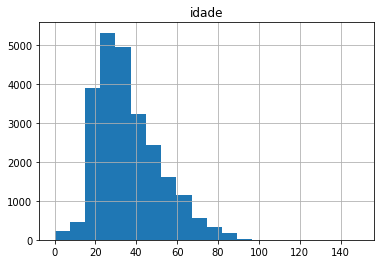

In [ ]:
#8.Gerar Gráficos pertinentes.
import matplotlib.pyplot as plt

print(df.columns)
df.hist(column='idade', bins=20)

#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#        shadow=True, startangle=90)
#ax1.axis('sexo')


#import matplotlib.pyplot as plt

#dados.hist(column='Age', bins=500) #cria o histograma. bins é referente ao tamanho da barra (largura)
#plt.show() #plota o histograma
#dados.describe()